In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Colab Notebooks/data_without_outliers.csv')

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 42868 entries, 0 to 42867
Data columns (total 10 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   id         42868 non-null  int64  
 1   date       42868 non-null  float64
 2   day        42868 non-null  int64  
 3   period     42868 non-null  float64
 4   nswprice   42868 non-null  float64
 5   nswdemand  42868 non-null  float64
 6   vicprice   42868 non-null  float64
 7   vicdemand  42868 non-null  float64
 8   transfer   42868 non-null  float64
 9   class      42868 non-null  object 
dtypes: float64(7), int64(2), object(1)
memory usage: 3.3+ MB


In [ ]:
df['class'].replace("UP", 1, inplace=True)   
df['class'].replace("DOWN", 0, inplace=True)
df.head(5)

,id,date,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer,class
0,2,0.0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912,1
1,3,0.0,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912,1
2,4,0.0,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912,1
3,5,0.0,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912,0
4,6,0.0,2,0.106383,0.041161,0.207528,0.003467,0.422915,0.414912,0


In [ ]:
y=df['class']
X=df.drop(columns=['class','id','date'])


In [ ]:
#train_split_ratio=0.6
#train_rows=round(X.shape[0]*train_split_ratio)
train_rows=26223

X_train=X[:train_rows]
y_train=y[:train_rows]

X_test=X[train_rows:]
y_test=y[train_rows:]

In [ ]:
X_train.head(5)

,day,period,nswprice,nswdemand,vicprice,vicdemand,transfer
0,2,0.021277,0.051699,0.415055,0.003467,0.422915,0.414912
1,2,0.042553,0.051489,0.385004,0.003467,0.422915,0.414912
2,2,0.063830,0.045485,0.314639,0.003467,0.422915,0.414912
3,2,0.085106,0.042482,0.251116,0.003467,0.422915,0.414912
4,2,0.106383,0.041161,0.207528,0.003467,0.422915,0.414912


In [ ]:
y_train.head(5)

0    1
1    1
2    1
3    0
4    0
Name: class, dtype: int64

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score

In [ ]:
clf = RandomForestClassifier(n_estimators=20, max_depth=5,random_state=0)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_test)
print(accuracy_score(y_test,predict1))

0.7079603484529888


In [ ]:
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

In [ ]:
n_estimators = [100]#[20,50,100]
max_depth = [5] #, 8,10,50]
min_samples_split = [5]#[2, 5, 10]
min_samples_leaf = [1]#, 2, 5, 10] 

In [ ]:
# Create grid
grid = {'n_estimators': n_estimators,
               'max_depth': max_depth,
               'min_samples_split': min_samples_split,
               'min_samples_leaf': min_samples_leaf
        }

In [ ]:
from sklearn.model_selection import GridSearchCV

# Use the random grid to search for best hyperparameters
# First create the base model to tune
clf = RandomForestClassifier()
# Random search of parameters, using 3 fold cross validation, 
# search across 100 different combinations, and use all available cores
clf_random = GridSearchCV(estimator = clf, param_grid = grid, cv = 10, verbose=4, n_jobs = -1,return_train_score=True)
# Fit the random search model
clf_random.fit(X_train, y_train)

Fitting 10 folds for each of 1 candidates, totalling 10 fits


GridSearchCV(cv=10, estimator=RandomForestClassifier(), n_jobs=-1,
             param_grid={'max_depth': [5], 'min_samples_leaf': [1],
                         'min_samples_split': [5], 'n_estimators': [100]},
             return_train_score=True, verbose=4)

In [ ]:
clf_random.best_params_

{'max_depth': 5,
 'min_samples_leaf': 1,
 'min_samples_split': 5,
 'n_estimators': 100}

In [ ]:
clf_random.best_score_

0.7783950606513466

In [ ]:
predict1 = clf_random.predict(X_test)
print(accuracy_score(y_test,predict1))

0.7110243316311204


In [ ]:
clf = RandomForestClassifier(n_estimators=100, max_depth=5,min_samples_split=5,min_samples_leaf=1,random_state=0)
clf.fit(X_train,y_train)

predict1 = clf.predict(X_test)

In [ ]:
clf.feature_importances_

array([0.02353799, 0.13889823, 0.60110962, 0.08581032, 0.0951091 ,
       0.03967468, 0.01586005])

<BarContainer object of 7 artists>

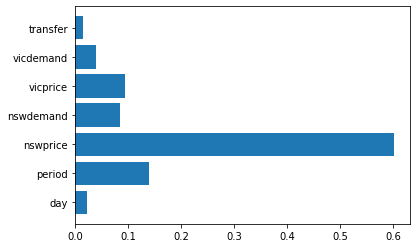

In [ ]:
plt.barh(X_train.columns, clf.feature_importances_)

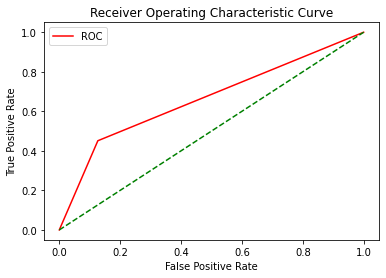

In [ ]:
from sklearn.metrics import roc_curve,plot_roc_curve

def plot_roc_curve(fper, tper):
    plt.plot(fper, tper, color='red', label='ROC')
    plt.plot([0, 1], [0, 1], color='green', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic Curve')
    plt.legend()
    plt.show()
    
fper, tper, thresholds = roc_curve(y_test,predict1)
plot_roc_curve(fper, tper)

In [ ]:
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
print(accuracy_score(y_test, predict1))	
print(recall_score(y_test, predict1))	
print(precision_score(y_test, predict1))	
print(f1_score(y_test, predict1))

0.7098828477020126
0.4511173184357542
0.6923076923076923
0.5462745466503806
